
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь").**


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline


**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [9]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [0]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [11]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [12]:
age_categories = [age_category(age) for age in data.Age]

In [14]:
data['Age_category'] = age_categories
print(data)

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...       

**Другой способ – через `apply`.**

In [0]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин вот этот вариант

In [10]:
male= data[(data['Sex'] == 'male')]
print(male.shape[0])
female= data[(data['Sex'] == 'female')]
print(female.shape[0])

577
314


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108 вот этот вариант
- 112
- 125

In [52]:
print(data[["Pclass","Sex"]].groupby(["Pclass"]).count())

print(data[(data['Sex'] == 'female')][["Pclass","Sex"]].groupby(["Pclass"]).count())
print(data[(data['Sex'] == 'male')][["Pclass","Sex"]].groupby(["Pclass"]).count())



        Sex
Pclass     
1       216
2       184
3       491
        Sex
Pclass     
1        94
2        76
3       144
        Sex
Pclass     
1       122
2       108
3       347


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69 вот сюда =_= 
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [54]:
print(data[["Fare"]].median())
print(data[["Fare"]].std())

Fare    14.4542
dtype: float64
Fare    49.693429
dtype: float64


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых вот этот вариант
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [65]:
print(data[(data['Age'] <= 30)][["Survived"]].sum()/data[(data['Age'] <= 30)][["Survived"]].count())
print(data[(data['Age'] > 60)][["Survived"]].sum()/data[(data['Age'] > 60)][["Survived"]].count())

Survived    0.405868
dtype: float64
Survived    0.227273
dtype: float64


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин вот этот вариант

In [67]:
print(data[(data['Sex'] == "male")][["Survived"]].sum()/data[(data['Sex'] == "male")][["Survived"]].count())
print(data[(data['Sex'] == "female")][["Survived"]].sum()/data[(data['Sex'] == "female")][["Survived"]].count())

Survived    0.188908
dtype: float64
Survived    0.742038
dtype: float64


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John
Panula - вот мой выбор. Мне кажется что я сделал что то не так. Я в начале вывел в отдельный столбик имя, после выделил только мужчин, а потом группировал по имени, а после сортировал и увидел результат

In [80]:
def firstName(fullname):
    return fullname[:fullname.find(',')]
   
data['First_name'] = data['Name'].apply(firstName)
print(data[(data['Sex'] == "male")].groupby(["First_name"]).count().sort_values(by='Name'))

            Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
First_name                                                                 
Abbing             1       1     1    1    1      1      1       1     1   
Novel              1       1     1    1    1      1      1       1     1   
Nosworthy          1       1     1    1    1      1      1       1     1   
Norman             1       1     1    1    1      1      1       1     1   
Niskanen           1       1     1    1    1      1      1       1     1   
...              ...     ...   ...  ...  ...    ...    ...     ...   ...   
Rice               4       4     4    4    4      4      4       4     4   
Goodwin            4       4     4    4    4      4      4       4     4   
Gustafsson         4       4     4    4    4      4      4       4     4   
Williams           4       4     4    4    2      4      4       4     4   
Panula             5       5     5    5    5      5      5       5     5   

           

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да <--- это так
- Нет

In [99]:
import matplotlib.pyplot as plt


             Survived  Pclass                                          Name  \
PassengerId                                                                   
804                 1       3               Thomas, Master. Assad Alexander   
756                 1       2                     Hamalainen, Master. Viljo   
645                 1       3                        Baclini, Miss. Eugenie   
470                 1       3                 Baclini, Miss. Helene Barbara   
832                 1       2               Richards, Master. George Sibley   
...               ...     ...                                           ...   
728                 1       3                      Mannion, Miss. Margareth   
741                 1       1                   Hawksford, Mr. Walter James   
829                 1       3                  McCormack, Mr. Thomas Joseph   
840                 1       1                          Marechal, Mr. Pierre   
850                 1       1  Goldenberg, Mrs. Samu

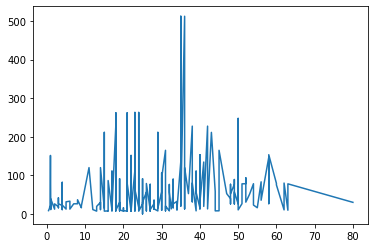

30.62617924528302


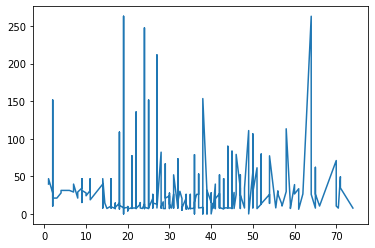

In [103]:
data2=data[(data['Survived']==1)].sort_values(by='Age')
print(data2)
print(data[(data['Survived']==1)]["Age"].mean())
plt.plot(data2["Age"], data2['Fare'])
plt.show()
data2=data[(data['Survived']==0)].sort_values(by='Age')
print(data[(data['Survived']==0)]["Age"].mean())
plt.plot(data2["Age"], data2['Fare'])
plt.show()
#data['PassengerId'].bar()

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет верно
- В среднем женщины 1-го класса старше 40 лет неверно
- Мужчины всех классов в среднем старше женщин того же класса верно
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса верно

In [108]:
data2=data[(data['Sex']=="male") & (data['Pclass']==1)]
print(data2["Age"].mean())
data2=data[(data['Sex']=="female") & (data['Pclass']==1)]
print(data2["Age"].mean())
data2=data[(data['Sex']=="male") ]
print(data2["Age"].mean())
data2=data[(data['Sex']=="female") ]
print(data2["Age"].mean())
data2=data[(data['Pclass']==1) ]
print(data2["Age"].mean())
data2=data[(data['Pclass']==2) ]
print(data2["Age"].mean())
data2=data[(data['Pclass']==3) ]
print(data2["Age"].mean())

41.28138613861386
34.61176470588235
30.72664459161148
27.915708812260537
38.233440860215055
29.87763005780347
25.14061971830986
